In [7]:
import sympy
from sympy.physics.quantum import TensorProduct
import numpy as np
from scipy.special import comb
sympy.init_printing()

In [36]:
t = sympy.Symbol('t')
T = sympy.Symbol('tau', commutative=False)
Ap = sympy.Symbol('rhoprime', commutative=False)
Bp = sympy.Symbol('sigmaprime', commutative=False)

In [9]:
A = t * T + (1 - t) * Ap
B = t * T + (1 - t) * Bp

In [28]:
#This case assumes some commutativity between Ap, T and Bp, T
n = 4
sum1 = 0
sum2 = 0
for k in range(n):
    sum1 += int(comb(int(n), 2*k)) * (t * T) ** 2*k * ((1 - t) * Ap) ** (n - 2*k)
    sum2 += int(comb(int(n) + k - 1, 2*k)) * (t * T) ** 2*k * ((1 - t) * Bp) ** (-n - 2*k)

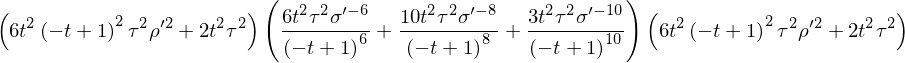

In [30]:
(sum1 * sum2 * sum1)

In [31]:
#General, noncommutting case

In [87]:
def M(A, B, i):
    sum1 = 0
    if i == 0:
        return 1
    if i == 1:
        return A + B
    for k in range(i+1):
        sum1 += int(comb(i, k)) * A ** k * B ** (i - k)
    return sum1
        
def binomial(A, B, n):
    if n == 1:
        return A + B
    else:
        if n > 0:
            return M(A, B, n) + intsum(A, B, n-2)
        else:
            return M_neg(A, B, n) + intsum_neg(A, B, n-2)

def M_neg(A, B, i):
    sum1 = 0
    if i == 0:
        return 1
    if i == -1:
        return 1 / (A + B)
    for k in range(-1 * i):
        sum1 += (-1) ** k * int(comb(-1 * i + k - 1, k)) * A ** k * B ** (-1 * i - k)
    return sum1
        
def intsum(A, B, np):
    sum2 = 0
    for k in range(np):
        sum2 += binomial(A, B, k) * (B * M(A, B, np+2) - M(A, B, np+2) * B)
    return sum2

def intsum_neg(A, B, np):
    sum2 = 0
    for k in range(np):
        sum2 += binomial(A, B, k) * (B * M(A, B, np+2) - M_neg(A, B, np+2) * B)
    return sum2

In [81]:
binomial(t * T, (1-t) * Ap, 2)

In [88]:
binomial(t * T, (1-t) * Bp, -2)